<div align="center">
<font size="6"> SIIM-ISIC Melanoma Classification  </font>  
</div> 


<div align="center">
<font size="4"> Identify melanoma in lesion images  </font>  
</div> 

<img align="left" src="https://raw.githubusercontent.com/kabartay/kaggle-siim-isic-melanoma-classification/master/materials/logo.png" data-canonical-src="https://raw.githubusercontent.com/kabartay/kaggle-siim-isic-melanoma-classification/master/materials/logo.png" width="280" height="280" />

Skin cancer is the most prevalent type of cancer. **Melanoma**, specifically, is responsible for **75%** of skin cancer deaths, despite being the least common skin cancer. The American Cancer Society estimates over 100,000 new melanoma cases will be diagnosed in 2020. It's also expected that almost 7,000 people will die from the disease. As with other cancers, early and accurate detection—potentially aided by data science—can make treatment more effective.

Currently, dermatologists evaluate every one of a patient's moles to identify outlier lesions or “ugly ducklings” that are most likely to be melanoma. Existing AI approaches have not adequately considered this clinical frame of reference. Dermatologists could enhance their diagnostic accuracy if detection algorithms take into account “contextual” images within the same patient to determine which images represent a melanoma. If successful, classifiers would be more accurate and could better support dermatological clinic work.

As the leading healthcare organization for informatics in medical imaging, the [Society for Imaging Informatics in Medicine (SIIM)](https://siim.org/)'s mission is to advance medical imaging informatics through education, research, and innovation in a multi-disciplinary community. SIIM is joined by the [International Skin Imaging Collaboration (ISIC)](https://www.isic-archive.com/), an international effort to improve melanoma diagnosis. The ISIC Archive contains the largest publicly available collection of quality-controlled dermoscopic images of skin lesions.

In this competition, you’ll identify melanoma in images of skin lesions. In particular, you’ll use images within the same patient and determine which are likely to represent a melanoma. Using patient-level contextual information may help the development of image analysis tools, which could better support clinical dermatologists.

Melanoma is a deadly disease, but if caught early, most melanomas can be cured with minor surgery. Image analysis tools that automate the diagnosis of melanoma will improve dermatologists' diagnostic accuracy. Better detection of melanoma has the opportunity to positively impact millions of people.

<img align="left" src="https://raw.githubusercontent.com/kabartay/kaggle-siim-isic-melanoma-classification/master/materials/melanoma.png" data-canonical-src="https://raw.githubusercontent.com/kabartay/kaggle-siim-isic-melanoma-classification/master/materials/melanoma.png" width="1200" height="450" />

<h2 style=color:Teal align="left"> Table of Contents </h2>

#### 1. ResNet
#### 2. Libraries
##### 2.1 Load Required Libraries
##### 2.2 Load TensorFlow
#### 3. Configs
#### 4 Paths
#### 5. Dataset
##### 5.1 Description
##### 5.2 EDA
#### 6. Keras image data processing
#### 7. Class weights
#### 8. Model
##### 8.1 Build model with ResNet50
##### 8.2 Visualize model with ResNet50
#### 9 Fit model
#### 10. Visualize performance
#### 11. Evaluate on test
#### 12. Submit predictions
#### References

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

if False:
    for dirname, _, filenames in os.walk('/kaggle/input'):
        for filename in filenames:
            print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 1. ResNet </h1>

Deeper neural networks are more difficult to train. A residual learning framework is easy to train. The layers as learning residual functions with reference to the layer inputs, instead of learning unreferenced functions are explicitly reformulated. It has been shown that residual networks are easier to optimize, and can gain accuracy from considerably increased depth. Residual nets (ResNets) are with a depth of up to 152 layers, i.e., x8 deeper than e.g. VGG nets but still having lower complexity. [Kaiming He et all. 2015]

ResNet50 stands for ResNet with 50 layers. See [architecture visualization](http://ethereon.github.io/netscope/#/gist/db945b393d40bfa26006).

&nbsp;

<div align="center">
<font size="4"> Residual learning: a building block.  </font>  
</div> 

<img align="left" src="https://raw.githubusercontent.com/kabartay/kaggle-siim-isic-melanoma-classification/master/materials/A-cell-from-the-Residual-Network-architecture-The-identity-connection-helps-to-reduce.png" data-canonical-src="https://raw.githubusercontent.com/kabartay/kaggle-siim-isic-melanoma-classification/master/materials/A-cell-from-the-Residual-Network-architecture-The-identity-connection-helps-to-reduce.png" width="350" height="350" />
The degradation (of training accuracy) indicates that not all systems are similarly easy to optimize. In [Kaiming He et all. 2015] the degradation problem is adressed by introducing a deep residual learning framework. Instead of hoping each few stacked layers directly fit a desired underlying mapping, we explicitly let these layers fit a residual mapping. Formally, denoting the desired underlying mapping as H(x), we let the stacked nonlinear layers fit another mapping of F(x) := H(x)−x. The original mapping is recast into F(x)+x. We hypothesize that it is easier to optimize the residual mapping than to optimize the original, unreferenced mapping. To the extreme, if an identity mapping were optimal, it would be easier to push the residual to zero than to fit an identity mapping by a stack of nonlinear layers. 

The formulation of F(x)+x can be realized by feedforward neural networks with ''shortcut connections'' (see scheme). Shortcut connections are those skipping one or
more layers. In our case, the shortcut connections simply perform identity mapping, and their outputs are added to the outputs of the stacked layers (see scheme). Identity shortcut connections add neither extra parameter nor computational complexity. The entire network can still be trained end-to-end by SGD with backpropagation, and can be easily implemented using common libraries

&nbsp;
&nbsp;


<div align="center">
<font size="4"> Example of a residual network with 34 parameter layers (ResNet34) vs VGG-19 with 19 layers as reference model.  </font>  
</div> 

<img align="center" src="https://raw.githubusercontent.com/kabartay/kaggle-siim-isic-melanoma-classification/master/materials/arch.jpg" data-canonical-src="https://raw.githubusercontent.com/kabartay/kaggle-siim-isic-melanoma-classification/master/materials/arch.jpg" width="670" height="1520" />

<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 2. Libraries </h1>

<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 2.1 Load Required Libraries </h1>

In [2]:
import os
import re
import glob
import pathlib
import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

import PIL
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

from collections import Counter

from warnings import filterwarnings
filterwarnings('ignore')

SEED=123
np.random.seed(SEED)

<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 2.2 Load TensorFlow </h1>

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.layers import (
    Input, Dense, Conv2D, Flatten, Activation, 
    MaxPooling2D, AveragePooling2D, ZeroPadding2D, GlobalAveragePooling2D, GlobalMaxPooling2D, add
)

from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.utils import plot_model

from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from tensorflow.keras.applications.inception_v3 import preprocess_input

<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 3. Configs </h1>

In [4]:
CFG = dict(
    batch_size        =  8,  # 8; 16; 32; 64; bigger batch size => moemry allocation issue
    epochs            =  10, # 5; 10; 20;
    verbose           =   1,  # 0; 1
    
    optimizer         = 'adam', # 'SGD', 'RMSprop'
     
    RANDOM_STATE      =  123,   
    
    # Images sizes
    img_size          = 224, 
    img_height        = 224, 
    img_width         = 224, 
    
    # Images augs
    ROTATION          = 180.0,
    ZOOM              =  10.0,
    ZOOM_RANGE        =  [0.9,1.1],
    HZOOM             =  10.0,
    WZOOM             =  10.0,
    HSHIFT            =  10.0,
    WSHIFT            =  10.0,
    SHEAR             =   5.0,
    HFLIP             = True,
    VFLIP             = True,
    
    # Postprocessing
    label_smooth_fac  =  0.05, # 0.01; 0.05; 0.1; 0.2;
    
)

<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 4. Paths </h1>

In [5]:
BASEPATH = "../input/siim-isic-melanoma-classification"
df_train_full = pd.read_csv(os.path.join(BASEPATH, 'train.csv'))
df_test  = pd.read_csv(os.path.join(BASEPATH, 'test.csv'))
df_sub   = pd.read_csv(os.path.join(BASEPATH, 'sample_submission.csv'))

In [6]:
#train_path = '../input/siim-isic-melanoma-classification/jpeg/train'
#test_path  = '../input/siim-isic-melanoma-classification/jpeg/test'

# Dataset ready for Keras load from directories (structured with respect to classes)
train_path = '../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Train'
test_path  = '../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Test'

In [7]:
train_dir = pathlib.Path(train_path)
test_dir  = pathlib.Path(test_path)

We can load images by
- `.flow_from_directory()` using information from subdirectories which has names from labels (we need to prepare data for that, 9 classes give 9 subdirs). Check [here](https://keras.io/api/preprocessing/image/#flowfromdataframe-method).
- `.flow_from_dataframe()` using information about labels from dataframe. Check [here](https://keras.io/api/preprocessing/image/). 

<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 5. Dataset </h1>
<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 5.1 Description </h1>

This set consists of **2357** images of **malignant** and **benign** oncological diseases, which were formed from [The International Skin Imaging Collaboration (ISIC)](https://www.isic-archive.com/).    
   - All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.

The data set contains the following diseases:  
- actinic keratosis
- basal cell carcinoma
- dermatofibroma
- melanoma
- nevus
- pigmented benign keratosis
- seborrheic keratosis
- squamous cell carcinoma
- vascular lesion

In [8]:
classes=[
    'pigmented benign keratosis',
    'melanoma',
    'vascular lesion',
    'actinic keratosis',
    'squamous cell carcinoma',
    'basal cell carcinoma',
    'seborrheic keratosis',
    'dermatofibroma',
    'nevus'
]

<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 5.2 EDA </h1>

In [9]:
# Image size check.   
# We plan to feed our network the images with size 224x224.

img = Image.open(train_path+'/melanoma/ISIC_0000139.jpg')
print(img.size) 

(2816, 2112)


In [10]:
# Count number of images in each set.
img_count_train = len(list(train_dir.glob('*/*.jpg')))
img_count_test  = len(list(test_dir.glob('*/*.jpg')))
print('{} train images'.format(img_count_train))
print('{} test  images'.format(img_count_test))

2239 train images
118 test  images


Found 2239 files belonging to 9 classes.
Using 1568 files for training.
Found 2239 files belonging to 9 classes.
Using 671 files for validation.
Found 118 files belonging to 9 classes.

9 classes:
['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


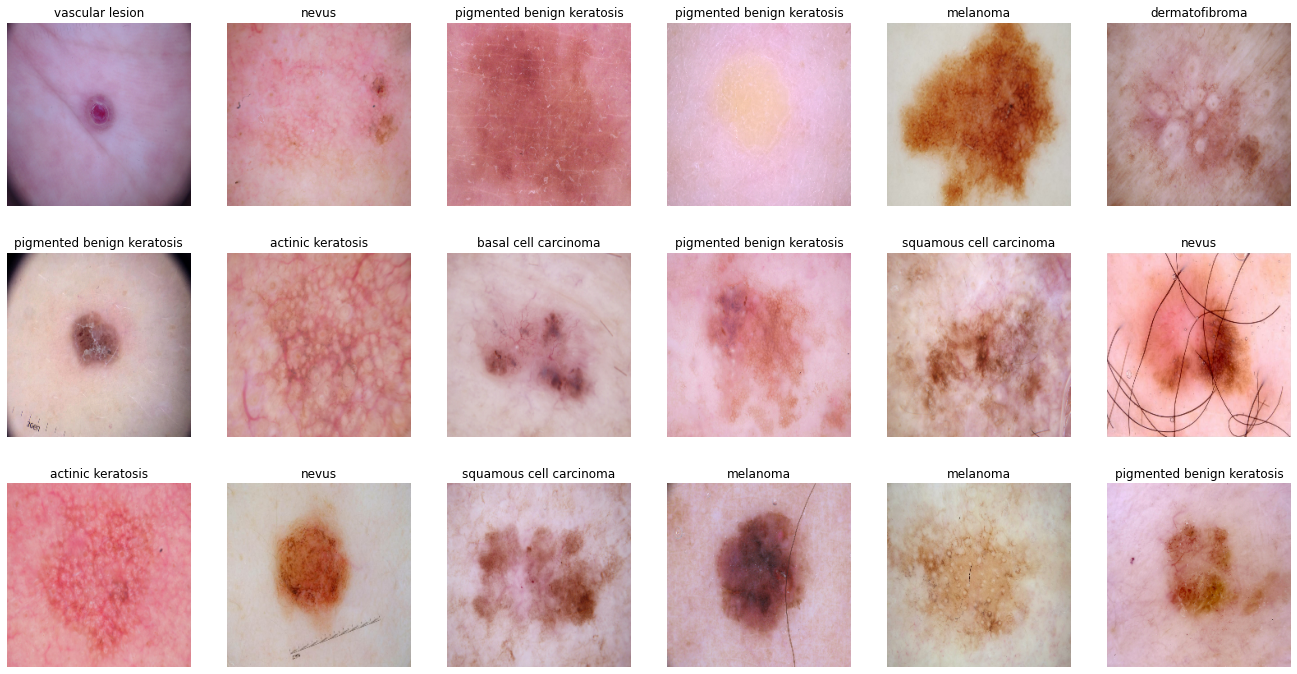

In [11]:
# We can read train and validation sets from same directory using Keras.

train_ds = tf.keras.preprocessing.image_dataset_from_directory(train_dir, validation_split=0.3, image_size=(224,224), subset="training", seed=SEED)
valid_ds = tf.keras.preprocessing.image_dataset_from_directory(train_dir, validation_split=0.3, image_size=(224,224), subset="validation",seed=SEED)
test_ds  = tf.keras.preprocessing.image_dataset_from_directory(test_dir, image_size=(224,224), seed=SEED)

class_names = train_ds.class_names
num_classes = len(class_names)
print('\n{} classes:\n{}'.format(num_classes,class_names))

plt.figure(figsize=(23, 12))
for images, labels in train_ds.take(1):
    for i in range(18):
        ax = plt.subplot(3, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 6. Keras image data processing </h1>

In [12]:
# https://keras.io/api/preprocessing/image/
# Check data processing flow from directory
# Check data augmentation 

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3,
    rotation_range            = CFG['ROTATION'],
    zoom_range                = CFG['ZOOM_RANGE'],
    horizontal_flip           = CFG['HFLIP'],
    vertical_flip             = CFG['VFLIP'],
    height_shift_range        = CFG['HSHIFT'],
    width_shift_range         = CFG['WSHIFT'],
    shear_range               = CFG['SHEAR'],
    channel_shift_range       = 0.0,
    brightness_range          = None,
    fill_mode                 = 'nearest',                          
    )

valid_generator = ImageDataGenerator(rescale=1./255, validation_split=0.3)              # no aug for valid
test_generator  = ImageDataGenerator(rescale=1./255)                                    # no aug for test


# Train data
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    subset='training',                  # to read train/valid from same directory 
                                                    target_size=(CFG['img_size'], CFG['img_size']),
                                                    batch_size = CFG['batch_size'],
                                                    class_mode='categorical',
                                                    )

# Validation data
valid_generator = valid_generator.flow_from_directory(train_dir,
                                                     subset='validation',               # to read train/valid from same directory 
                                                     target_size=(CFG['img_size'], CFG['img_size']),
                                                     batch_size = CFG['batch_size'],
                                                     class_mode='categorical'
                                                     ) 
# Test data
test_generator  = test_generator.flow_from_directory(test_dir,
                                                     target_size=(CFG['img_size'], CFG['img_size']),
                                                     batch_size = 1,                    # using 1 to easily manage mapping between test_gen & pred
                                                     class_mode='categorical'
                                                     )

Found 1571 images belonging to 9 classes.
Found 668 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 7. Class weights </h1>

In [13]:
# Class weights
class_weights = class_weight.compute_class_weight('balanced',
                                                  np.unique(train_generator.classes), 
                                                  train_generator.classes) 

unique_class_weights = np.unique(train_generator.classes)
class_weights_dict   = { unique_class_weights[i]: w for i,w in enumerate(class_weights) }

print('\nCLASS WEIGHTS: {}\n'.format(class_weights))
print(np.unique(train_generator.classes))
print(train_generator.classes)
print(unique_class_weights)
print(Counter(train_generator.classes).keys())   # equals to list(set(x))
print(Counter(train_generator.classes).values()) # counts the elements' frequency


CLASS WEIGHTS: [2.18194444 0.66119529 2.6053068  0.56858487 0.69822222 0.53875171
 3.23251029 1.37445319 1.78117914]

[0 1 2 3 4 5 6 7 8]
[0 0 0 ... 8 8 8]
[0 1 2 3 4 5 6 7 8]
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8])
dict_values([80, 264, 67, 307, 250, 324, 54, 127, 98])


<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 8. Model </h1>

<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 8.1 Build model with ResNet50 </h1>

In [14]:
model_ResNet50 = tf.keras.Sequential([
     tf.keras.applications.ResNet50(
        input_shape=(224, 224, 3),
        weights='imagenet',
        include_top=False
    ),
    
    GlobalAveragePooling2D(),
    
    #Dense(1024, activation = 'relu'), 
    #Dropout(0.5), 
    #BatchNormalization(),
    
    #Dense(256, activation='relu'), 
    #Dropout(0.3), 
    #BatchNormalization(),
    
    #Dense(64, activation='relu'), 
    #Dropout(0.2), 
    #BatchNormalization(),
    
    Dense(num_classes, activation='softmax') # num classes = 9
    
])
    
model_ResNet50.compile(
    optimizer = CFG['optimizer'],
    loss = tf.keras.losses.BinaryCrossentropy(label_smoothing = CFG['label_smooth_fac']),
    #loss = 'binary_crossentropy',
    metrics=['accuracy']
)

94773248/94765736 [==============================] - 0s 0us/step


In [15]:
# Possible loss: focal loss
# BCE -> focal loss (due to class imbalance)
# Advance by youself!

from keras import backend as K

def focal_loss(alpha=0.20,gamma=2.0):
    def focal_crossentropy(y_true, y_pred):
        bce = K.binary_crossentropy(y_true, y_pred)
        
        y_pred = K.clip(y_pred, K.epsilon(), 1.- K.epsilon())
        p_t = (y_true*y_pred) + ((1-y_true)*(1-y_pred))
        
        alpha_factor = 1
        modulating_factor = 1

        alpha_factor = y_true*alpha + ((1-alpha)*(1-y_true))
        modulating_factor = K.pow((1-p_t), gamma)

        # compute the final loss and return
        return K.mean(alpha_factor*modulating_factor*bce, axis=-1)
    
    return focal_crossentropy

<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 8.2 Visualize model with ResNet50 </h1>

In [16]:
model_ResNet50.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 9)                 18441     
Total params: 23,606,153
Trainable params: 23,553,033
Non-trainable params: 53,120
_________________________________________________________________


In [17]:
# We reduce significantly number of trainable parameters by freezing certain layers, excluding from training, i.e. their weights will never be updated

# freeze the first 1 layer

model_ResNet50.layers[0].trainable = False
#for layer in model_ResNet50.layers[:1]:
#    layer.trainable = False
model_ResNet50.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 9)                 18441     
Total params: 23,606,153
Trainable params: 18,441
Non-trainable params: 23,587,712
_________________________________________________________________


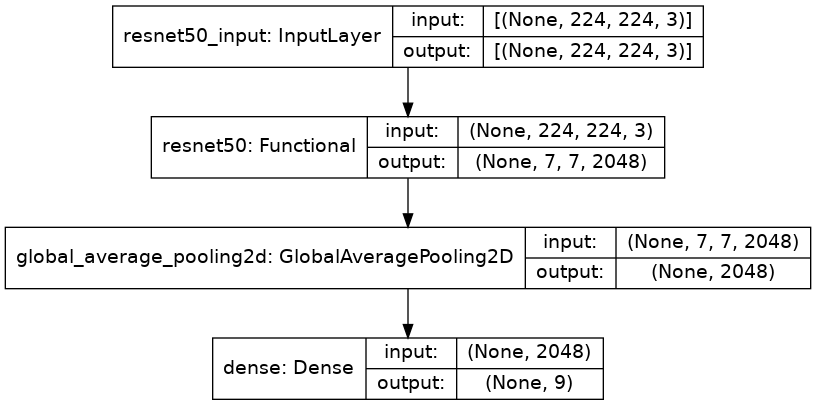

In [18]:
# Plot model scheme with TF/Keras plot_model function
plot_model(model_ResNet50, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 9 Fit model </h1>

In [19]:
path_model = '../working/'

EPOCHS  = 100
WORKERS = 4

#tf.function-decorated function tried to create variables on non-first call'. 
tf.config.run_functions_eagerly(True) # otherwise error

# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint
cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = 10)
cb_checkpointer  = ModelCheckpoint(#filepath=path_model, 
                                   filepath='../working/ResNet50-{epoch:02d}-{val_loss:.2f}.hdf5',
                                   monitor='val_loss', 
                                   verbose=1, 
                                   save_best_only=True, 
                                   mode='min'
                                  )

callbacks_list = [cb_checkpointer, cb_early_stopper]

history = model_ResNet50.fit(train_generator, 
                             epochs=EPOCHS, 
                             workers=WORKERS,
                             #steps_per_epoch = train_generator.n // 2, # hide if you wish
                             validation_data=valid_generator, 
                             #validation_steps=valid_generator.n // 2,  # hide if you wish
                             callbacks = callbacks_list,
                             class_weight = class_weights_dict
                            )

Epoch 1/100
197/197 [==============================] - 71s 333ms/step - loss: 0.4407 - accuracy: 0.2125 - val_loss: 0.6507 - val_accuracy: 0.0614

Epoch 00001: val_loss improved from inf to 0.65074, saving model to ../working/ResNet50-01-0.65.hdf5
Epoch 2/100
197/197 [==============================] - 64s 320ms/step - loss: 0.3678 - accuracy: 0.2461 - val_loss: 0.5729 - val_accuracy: 0.0614

Epoch 00002: val_loss improved from 0.65074 to 0.57295, saving model to ../working/ResNet50-02-0.57.hdf5
Epoch 3/100
197/197 [==============================] - 64s 322ms/step - loss: 0.3469 - accuracy: 0.3052 - val_loss: 0.6192 - val_accuracy: 0.0614

Epoch 00003: val_loss did not improve from 0.57295
Epoch 4/100
197/197 [==============================] - 64s 320ms/step - loss: 0.3407 - accuracy: 0.3741 - val_loss: 0.5677 - val_accuracy: 0.2290

Epoch 00004: val_loss improved from 0.57295 to 0.56772, saving model to ../working/ResNet50-04-0.57.hdf5
Epoch 5/100
197/197 [=============================

<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 10. Visualize performance </h1>

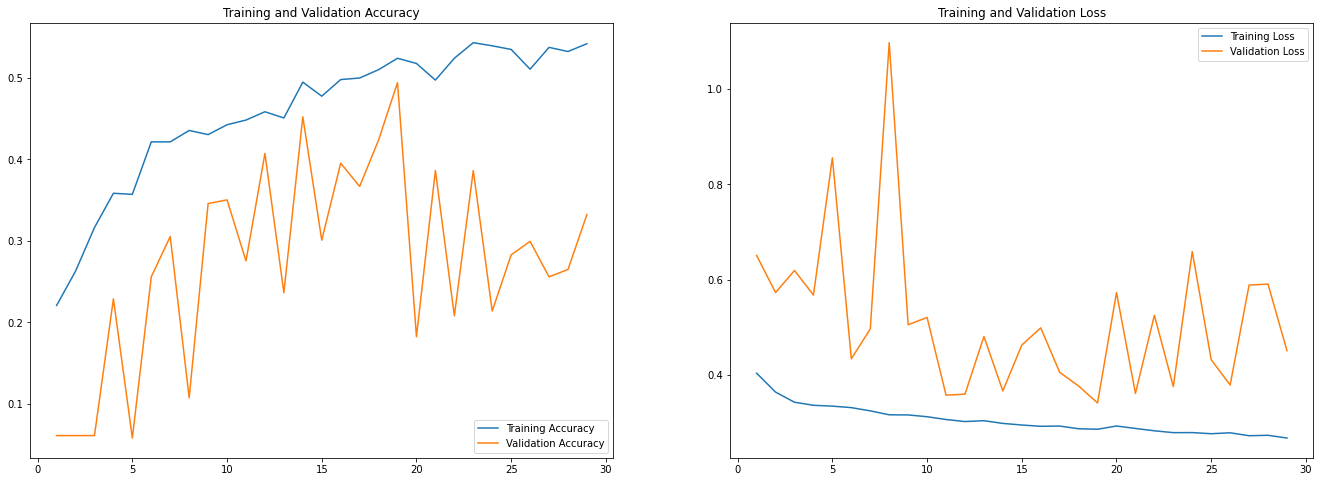

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

metrics = history.history['accuracy']
epochs_range = range(1, len(metrics) + 1) 

plt.figure(figsize=(23, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 11. Evaluate on test </h1>

In [21]:
print('Computing predictions...')
test_images_ds = test_ds.map(lambda image, idnum: image)
probabilities = model_ResNet50.predict(test_images_ds) # check that images processed same size, default for image from dir is 256,256

Computing predictions...


In [22]:
# 118 images, 9 classes
probabilities.shape

(118, 9)

In [23]:
# probabilities for each class for first test image
probabilities[0,:]

array([4.1950893e-06, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       9.9999583e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00], dtype=float32)

In [24]:
probabilities[0,:].shape

(9,)

In [25]:
test_ds.class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [26]:
# probability for melanoma class
probabilities[:,4] 

array([9.9999583e-01, 0.0000000e+00, 0.0000000e+00, 7.8490781e-19,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 4.5851665e-09, 4.3239277e-16, 5.3550705e-29,
       1.0000000e+00, 3.5502609e-07, 1.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.3343761e-22,
       9.9198663e-32, 5.7372062e-35, 3.9887880e-38, 0.0000000e+00,
       0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.3042804e-08,
       1.1498837e-13, 1.0000000e+00, 0.0000000e+00, 2.0428124e-10,
       0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 1.4046670e-33, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e

In [27]:
probabilities[:,4].shape # N images and (N,) predictions

(118,)

Issue with predictions to be fixed. 

<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 12. Submit predictions </h1>

In [28]:
file_paths = test_ds.file_paths

k = 1
while k<20:
    print(file_paths[k])
    k += 1

../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Test/pigmented benign keratosis/ISIC_0024408.jpg
../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Test/melanoma/ISIC_0000035.jpg
../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Test/pigmented benign keratosis/ISIC_0024358.jpg
../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Test/basal cell carcinoma/ISIC_0024454.jpg
../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Test/vascular lesion/ISIC_0024402.jpg
../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Test/melanoma/ISIC_0000056.jpg
../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Test/pigmented benign keratosis/ISIC_0024381.jpg
../input/skin-cancer9-classesisic/Skin

In [29]:
file_paths[1].split(os.sep)[-1]

'ISIC_0024408.jpg'

In [30]:
print('Generating submission.csv file...')
test_ids_ds = test_ds.map(lambda image, idnum: idnum).unbatch()
test_ids = next(iter(test_ids_ds.batch(img_count_test))).numpy().astype('U')

img_list = []
img_id_list = []
img_name_list = []
for i in range(len(file_paths)):
    img_list.append(file_paths[i].split(os.sep)[-1])
    img_id_list.append(i)
    img_name_list.append(file_paths[i].split(os.sep)[-1][0:-4])

img_name_list_by_test_ids = []
for iid in list(test_ids):
    print(int(iid),img_name_list[int(iid)],probabilities[:,4][int(iid)]) # here dummy iid got str not int, thus converted
    img_name_list_by_test_ids.append(img_name_list[int(iid)])

Generating submission.csv file...
2 ISIC_0000035 0.0
6 ISIC_0000056 0.0
5 ISIC_0024402 0.0
0 ISIC_0024511 0.9999958
0 ISIC_0024511 0.9999958
3 ISIC_0024358 7.849078e-19
1 ISIC_0024408 0.0
5 ISIC_0024402 0.0
0 ISIC_0024511 0.9999958
7 ISIC_0024381 1.0
1 ISIC_0024408 0.0
4 ISIC_0024454 0.0
2 ISIC_0000035 0.0
8 ISIC_0024422 0.0
8 ISIC_0024422 0.0
2 ISIC_0000035 0.0
5 ISIC_0024402 0.0
7 ISIC_0024381 1.0
0 ISIC_0024511 0.9999958
4 ISIC_0024454 0.0
3 ISIC_0024358 7.849078e-19
3 ISIC_0024358 7.849078e-19
4 ISIC_0024454 0.0
7 ISIC_0024381 1.0
3 ISIC_0024358 7.849078e-19
8 ISIC_0024422 0.0
7 ISIC_0024381 1.0
1 ISIC_0024408 0.0
5 ISIC_0024402 0.0
4 ISIC_0024454 0.0
0 ISIC_0024511 0.9999958
3 ISIC_0024358 7.849078e-19
0 ISIC_0024511 0.9999958
2 ISIC_0000035 0.0
7 ISIC_0024381 1.0
4 ISIC_0024454 0.0
2 ISIC_0000035 0.0
1 ISIC_0024408 0.0
7 ISIC_0024381 1.0
5 ISIC_0024402 0.0
1 ISIC_0024408 0.0
0 ISIC_0024511 0.9999958
2 ISIC_0000035 0.0
1 ISIC_0024408 0.0
4 ISIC_0024454 0.0
7 ISIC_0024381 1.0
3 ISI

In [31]:
#pred_df = pd.DataFrame({'image_name': img_name_list_by_test_ids, 'target': probabilities[:,1]}) # 'ids':test_ids
pred_df = pd.DataFrame({'image_name': img_name_list, 'target': probabilities[:,4]}) # 'ids':test_ids
pred_df.head()

,image_name,target
0,ISIC_0024511,9.999958e-01
1,ISIC_0024408,0.000000e+00
2,ISIC_0000035,0.000000e+00
3,ISIC_0024358,7.849078e-19
4,ISIC_0024454,0.000000e+00


In [32]:
pred_df['target'].unique()

array([9.9999583e-01, 0.0000000e+00, 7.8490781e-19, 1.0000000e+00,
       4.5851665e-09, 4.3239277e-16, 5.3550705e-29, 3.5502609e-07,
       1.3343761e-22, 9.9198663e-32, 5.7372062e-35, 3.9887880e-38,
       1.3042804e-08, 1.1498837e-13, 2.0428124e-10, 1.4046670e-33,
       4.8178053e-16, 3.6228579e-02, 3.7586194e-06, 2.2558717e-01,
       4.1184851e-15, 1.0185604e-06, 6.9212419e-26, 2.7502086e-15,
       8.8479582e-31, 1.3276225e-38], dtype=float32)

In [33]:
#del df_sub['target']
#sub = df_sub.merge(pred_df, on='image_name')
#sub.to_csv('submission.csv', index=False)
#sub.head()

<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> References </h1>

- [Data] [SIIM-ISIC Skin cancer 9 classes](https://www.kaggle.com/nodoubttome/skin-cancer9-classesisic)
- [ResNet] [Keras ResNet](https://keras.io/api/applications/resnet/)
- [ResNet] [Keras ResNet50 on Kaggle](https://www.kaggle.com/keras/resnet50)
- [Article] [Kaiming He et al Deep Residual Learning for Image Recognition. (CVPR 2015)](https://arxiv.org/abs/1512.03385)
- [Article] [Simonyan, K. and Zisserman, A. Very Deep Convolutional Networks for Large-Scale Image Recognition. (ICLR 2015)](https://arxiv.org/abs/1409.1556)
- [VGG] [Keras VGG](https://keras.io/api/applications/vgg/)
- [Keras] [Keras image data preprocessing](https://keras.io/api/preprocessing/image/)
- [TF/Keras] [BinaryCrossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy)
- [TF/Keras] [ModelCheckpoint](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint), [see also](https://keras.io/api/callbacks/model_checkpoint/) 
- [Notebook] [SIIM-ISIC Melanoma Classification EfficientNet](https://www.kaggle.com/muhakabartay/siim-isic-melanoma-classification-efficientnet) 